In [ ]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Una empresa que proporciona asesoramiento de compra de ropa de manera presencial, así como la opción de comprar prendas a través de su página web o aplicación móvil, está buscando evaluar la experiencia de usuario en ambas modalidades.

In [ ]:
data=pd.read_csv("/content/Ecommerce Customers.csv")

#Analisis de Data

In [ ]:
data.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092



Los registros contienen valiosa información, como direcciones de correo electrónico, domicilios, avatares asociados, promedio de tiempo de sesión, duración en la aplicación y en el sitio web, volumen de compras anuales y el periodo de afiliación a la tienda

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


A continuación, se procederá a analizar la relación entre los tiempos dedicados por los clientes en la aplicación y el sitio web, considerando la antigüedad de los mismos en la tienda

In [ ]:
data["Length of Membership_cut"]=pd.cut(data["Length of Membership"],5)
data["Length of Membership_cut"].unique()

[(2.931, 4.262], (1.6, 2.931], (4.262, 5.592], (0.263, 1.6], (5.592, 6.923]]
Categories (5, interval[float64, right]): [(0.263, 1.6] < (1.6, 2.931] < (2.931, 4.262] <
                                           (4.262, 5.592] < (5.592, 6.923]]

In [ ]:
data["Length of Membership_cut"].value_counts(normalize=True)*100

(2.931, 4.262]    53.4
(1.6, 2.931]      21.2
(4.262, 5.592]    20.0
(0.263, 1.6]       3.8
(5.592, 6.923]     1.6
Name: Length of Membership_cut, dtype: float64

In [ ]:
data["timeweb_cut"]=pd.cut(data["Time on Website"],5)
data["timeweb_cut"].unique()


[(38.787, 40.005], (36.35, 37.569], (33.908, 35.132], (35.132, 36.35], (37.569, 38.787]]
Categories (5, interval[float64, right]): [(33.908, 35.132] < (35.132, 36.35] < (36.35, 37.569] <
                                           (37.569, 38.787] < (38.787, 40.005]]

In [ ]:
clientes_web=pd.DataFrame(data["timeweb_cut"].value_counts(normalize=True)*100)
clientes_web["Intervalo"]=clientes_web.index
clientes_web=clientes_web.reset_index(drop=True)
clientes_web

,timeweb_cut,Intervalo
0,44.2,"(36.35, 37.569]"
1,25.8,"(37.569, 38.787]"
2,22.0,"(35.132, 36.35]"
3,5.0,"(38.787, 40.005]"
4,3.0,"(33.908, 35.132]"


<ipython-input-66-92a570a27643>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=clientes_web, x="Intervalo",y="timeweb_cut", palette="viridis", order=clientes_web.sort_values("timeweb_cut").Intervalo)
<ipython-input-66-92a570a27643>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


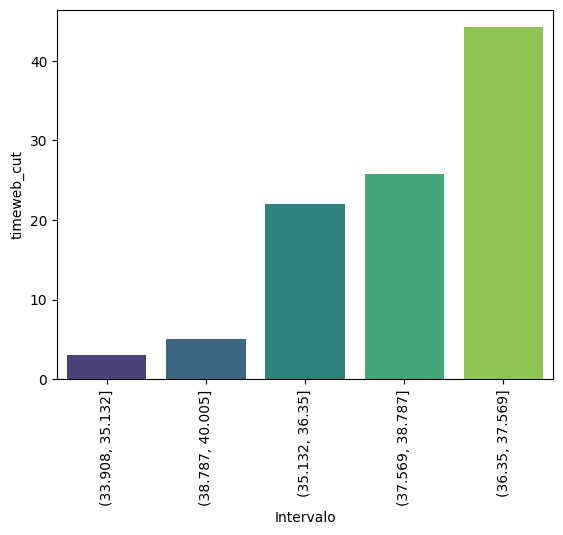

In [ ]:
ax=sns.barplot(data=clientes_web, x="Intervalo",y="timeweb_cut", palette="viridis", order=clientes_web.sort_values("timeweb_cut").Intervalo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

en el Intervalo (36.35, 37.569] se tiene un 44,2%

In [ ]:
data["timeApp_cut"]=pd.cut(data["Time on App"],5)
data["timeApp_cut"].unique()


[(12.479, 13.803], (9.832, 11.156], (11.156, 12.479], (13.803, 15.127], (8.502, 9.832]]
Categories (5, interval[float64, right]): [(8.502, 9.832] < (9.832, 11.156] < (11.156, 12.479] <
                                           (12.479, 13.803] < (13.803, 15.127]]


Se ha procedido a segmentar el tiempo en la aplicación en distintos intervalos: [(8.502, 9.832], (9.832, 11.156], (11.156, 12.479], (12.479, 13.803], (13.803, 15.127]. En este análisis, se está contabilizando el porcentaje de clientes que pertenecen a cada uno de estos intervalos.

In [ ]:
clientes_app=pd.DataFrame(data["timeApp_cut"].value_counts(normalize=True)*100)
clientes_app

,timeApp_cut
"(11.156, 12.479]",47.2
"(12.479, 13.803]",30.4
"(9.832, 11.156]",17.4
"(13.803, 15.127]",3.8
"(8.502, 9.832]",1.2


In [ ]:
clientes_app["Intervalo"]=clientes_app.index

In [ ]:
clientes_app = clientes_app.reset_index(drop=True)
clientes_app=clientes_app.sort_values(by="timeApp_cut")
clientes_app

,timeApp_cut,Intervalo
0,1.2,"(8.502, 9.832]"
1,3.8,"(13.803, 15.127]"
2,17.4,"(9.832, 11.156]"
3,30.4,"(12.479, 13.803]"
4,47.2,"(11.156, 12.479]"


el 47.2% de los clientes se encuentran en el intervalo (11.156, 12.479]

In [ ]:
clientes_app.info()

<ipython-input-56-f021a77ff9a9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=clientes_app, x="Intervalo",y="timeApp_cut", palette="viridis", order=clientes_app.sort_values("timeApp_cut").Intervalo)
<ipython-input-56-f021a77ff9a9>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


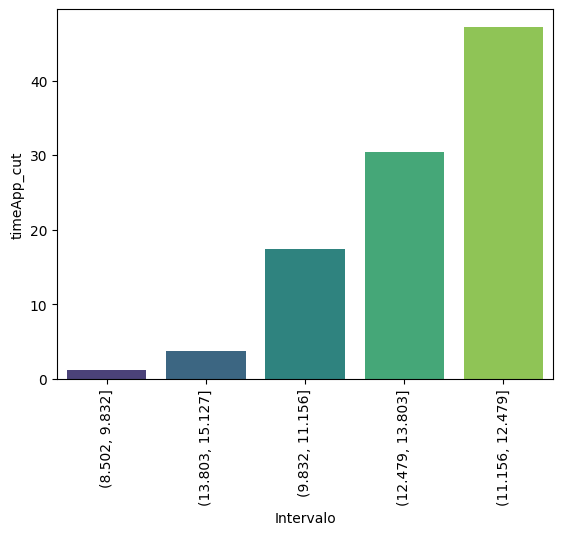

In [ ]:
ax=sns.barplot(data=clientes_app, x="Intervalo",y="timeApp_cut", palette="viridis", order=clientes_app.sort_values("timeApp_cut").Intervalo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


In [ ]:
timeApp_Membership=pd.crosstab(data["Length of Membership_cut"],data["timeApp_cut"], normalize=True, margins=True)*100
timeApp_Membership

timeApp_cut,"(8.502, 9.832]","(9.832, 11.156]","(11.156, 12.479]","(12.479, 13.803]","(13.803, 15.127]",All
Length of Membership_cut,,,,,,
"(0.263, 1.6]",0.0,0.6,1.6,1.4,0.2,3.8
"(1.6, 2.931]",0.8,2.8,10.6,6.6,0.4,21.2
"(2.931, 4.262]",0.0,10.4,25.6,15.6,1.8,53.4
"(4.262, 5.592]",0.4,3.4,8.8,6.2,1.2,20.0
"(5.592, 6.923]",0.0,0.2,0.6,0.6,0.2,1.6
All,1.2,17.4,47.2,30.4,3.8,100.0


In [ ]:
timeweb_Membership=pd.crosstab(data["Length of Membership_cut"],data["timeweb_cut"], normalize=True, margins=True)*100
timeweb_Membership

timeweb_cut,"(33.908, 35.132]","(35.132, 36.35]","(36.35, 37.569]","(37.569, 38.787]","(38.787, 40.005]",All
Length of Membership_cut,,,,,,
"(0.263, 1.6]",0.2,0.6,1.4,1.0,0.6,3.8
"(1.6, 2.931]",0.6,4.6,9.6,5.6,0.8,21.2
"(2.931, 4.262]",1.6,10.4,25.6,12.6,3.2,53.4
"(4.262, 5.592]",0.4,6.0,7.0,6.2,0.4,20.0
"(5.592, 6.923]",0.2,0.4,0.6,0.4,0.0,1.6
All,3.0,22.0,44.2,25.8,5.0,100.0


Se destaca que un notable 53.4% de los clientes exhiben un tiempo de antigüedad en el intervalo específico de (2.931, 4.262]
El tiempo de uso de la aplicación web es considerablemente mayor para todos los clientes en general. Este hallazgo sugiere que, independientemente de la antigüedad, los usuarios destinan más tiempo a utilizar la aplicación web, señalando un patrón constante de participación activa y continua con la plataforma.

In [ ]:
agrupados = data.groupby("Length of Membership_cut")["Yearly Amount Spent"].mean()
agrupados=pd.DataFrame(agrupados)
agrupados

,Yearly Amount Spent
Length of Membership_cut,
"(0.263, 1.6]",349.910112
"(1.6, 2.931]",431.320406
"(2.931, 4.262]",502.904388
"(4.262, 5.592]",574.586592
"(5.592, 6.923]",694.329143


<ipython-input-83-14d7c11fb112>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(agrupados, x="Length of Membership_cut", y="Yearly Amount Spent", palette="magma")


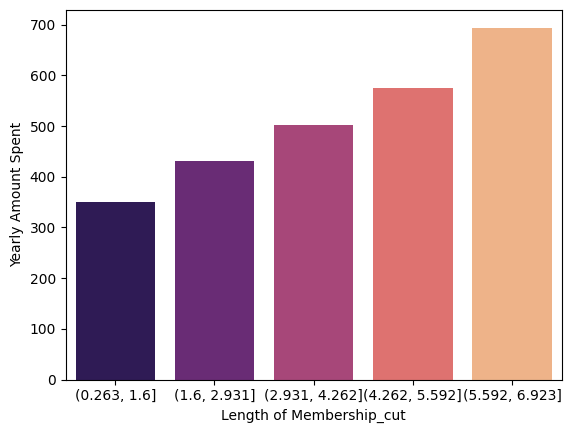

In [ ]:
ax=sns.barplot(agrupados, x="Length of Membership_cut", y="Yearly Amount Spent", palette="magma")

In [ ]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'timeApp_cut', 'timeweb_cut', 'Length of Membership_cut'],
      dtype='object')

Se observa que los clientes con una antigüedad más prolongada tienen un comportamiento de compra significativamente diferente. En promedio, estos clientes más antiguos registran un gasto de 694.329143, lo que sugiere una relación positiva entre la lealtad del cliente a lo largo del tiempo y el monto total gastado.


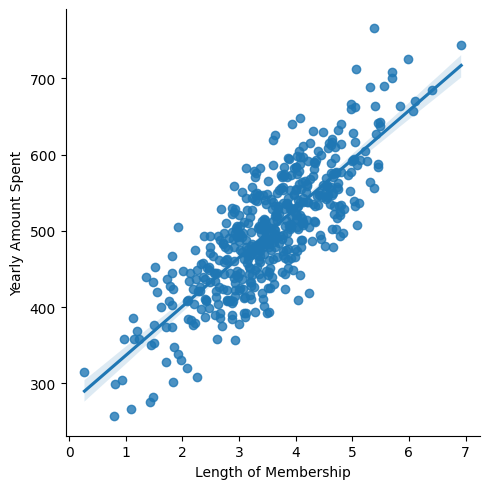

In [ ]:
sns.lmplot(data, x='Length of Membership', y='Yearly Amount Spent')

Al examinar los datos, se identifica una clara relación lineal entre la segmentación de los clientes según su antigüedad y el monto de sus compras. Este análisis sugiere que, a medida que los clientes extienden su lealtad a lo largo del tiempo, exhiben una tendencia a gastar más de manera constante. Esta conexión lineal observada refleja un vínculo de fidelidad, indicando que los clientes han mantenido un patrón continuo de compras a lo largo de su relación con la empresa. Este patrón ofrece perspectivas valiosas en términos de estrategias de **retención**, subrayando la importancia de nutrir y fortalecer las relaciones a largo plazo con la clientela para impulsar compras recurrentes y sostenidas

#Regresion Lineal

Finalmente, se procederá a la construcción de un modelo de regresión lineal. Este enfoque permitirá analizar de manera más precisa la relación entre las variables de interés y proporcionará insights valiosos para comprender mejor el comportamiento de los clientes en relación con la antigüedad y el tiempo de uso de la aplicación web

<ipython-input-92-8e1d420b4055>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


<Axes: >

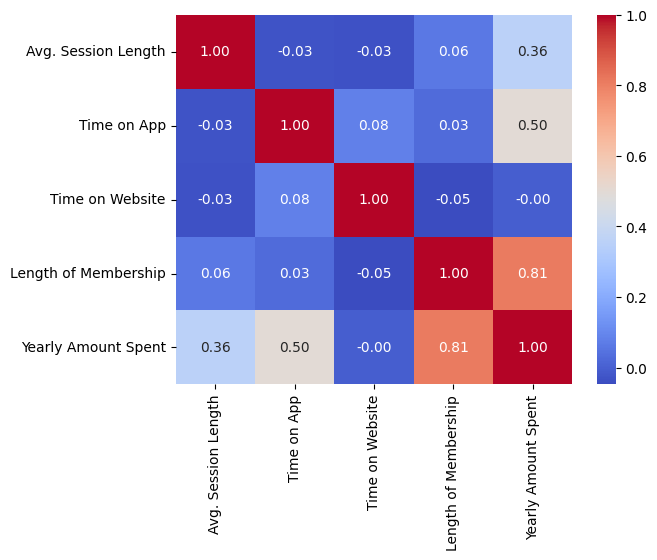

In [ ]:
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

In [ ]:
y=data['Yearly Amount Spent']
X =data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3 ,random_state=42)

In [156]:
modelo = LinearRegression()

modelo.fit(X_train,y_train)

LinearRegression()

In [159]:
r2_test = modelo.score(X_test, y_test)
r2_test

0.9808757641125855

In [160]:
print(f"significa que alrededor del 98.09% de la variabilidad en la variable de respuesta es explicada por las variables predictoras ")

significa que alrededor del 98.09% de la variabilidad en la variable de respuesta es explicada por las variables predictoras 


In [146]:
coeficientes=modelo.coef_


In [148]:
modelo_explicativo = pd.DataFrame({'Coeficiente': coeficientes, 'Variable Predictora': X.columns})
modelo_explicativo

,Coeficiente,Variable Predictora
0,25.724256,Avg. Session Length
1,38.597135,Time on App
2,0.459148,Time on Website
3,61.674732,Length of Membership


Por cada aumento de una unidad en el tiempo dedicado a la aplicación, la variable de respuesta aumenta en aproximadamente 38.60 unidades, manteniendo constantes las otras variables.
Por cada aumento de una unidad en el tiempo dedicado al sitio web, la variable de respuesta aumenta en aproximadamente 0.46 unidades, manteniendo constantes las otras variables.
 Por cada aumento de una unidad en la duración de la membresía, la variable de respuesta aumenta en aproximadamente 61.67 unidades, manteniendo constantes las otras variables.

In [132]:
prediction=modelo.predict(X_test)

In [133]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 8.426091641432116
MSE: 103.91554136503333
RMSE: 10.193897260863155


In [151]:
modelo=pd.DataFrame({'Actual':y_test.tolist(), 'Predicciones':prediction.tolist()})
modelo.head(10)

,Actual,Predicciones
0,401.033135,403.669931
1,534.777188,542.577563
2,418.602742,427.065917
3,503.978379,502.024604
4,410.069611,410.121436
5,557.608262,569.934425
6,538.941975,531.934313
7,514.336558,506.296510
8,408.620188,408.718707
9,475.015407,473.977371


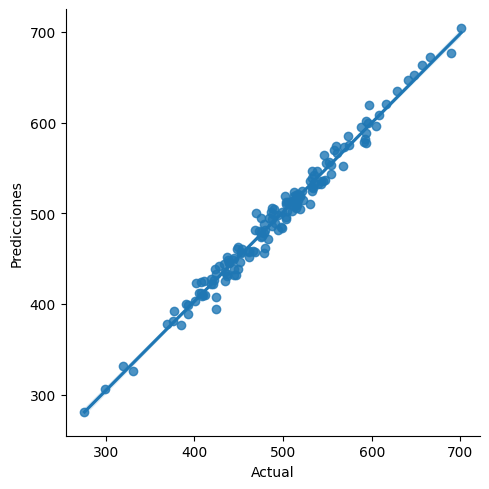

In [153]:
sns.lmplot(data=modelo, x="Actual", y="Predicciones")